### Linear Regression from scratch

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *

$$
\Large y = f(x) = wx + b + \epsilon
$$

### 1. Prepare data for Linear Regression

##### 1.1 Generate synthetic data

In [2]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)

# Create an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1)
X = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))

y = true_b + true_w * X + epsilon

In [50]:
import pandas as pd
df = pd.DataFrame({ "x": X.tolist(), "y": y.tolist()})
df.head()

,x,y
0,[0.3745401188473625],[1.757784944518542]
1,[0.9507143064099162],[2.8715278777732456]
2,[0.7319939418114051],[2.4731639612763603]
3,[0.5986584841970366],[1.998560076933984]
4,[0.15601864044243652],[1.290070092101122]


Text(0, 0.5, 'y')

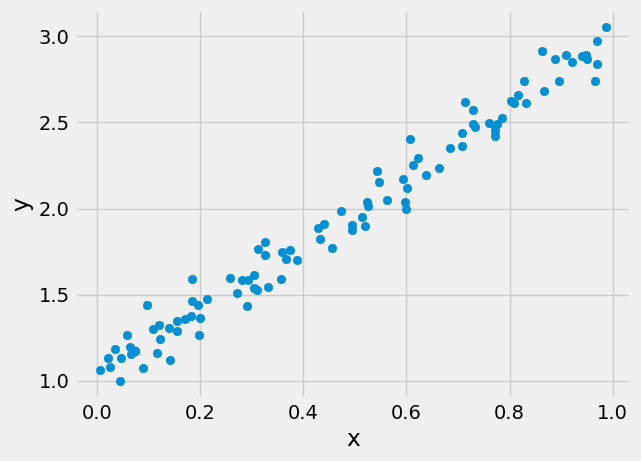

In [3]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

##### 1.2 Train Test split

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]

# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

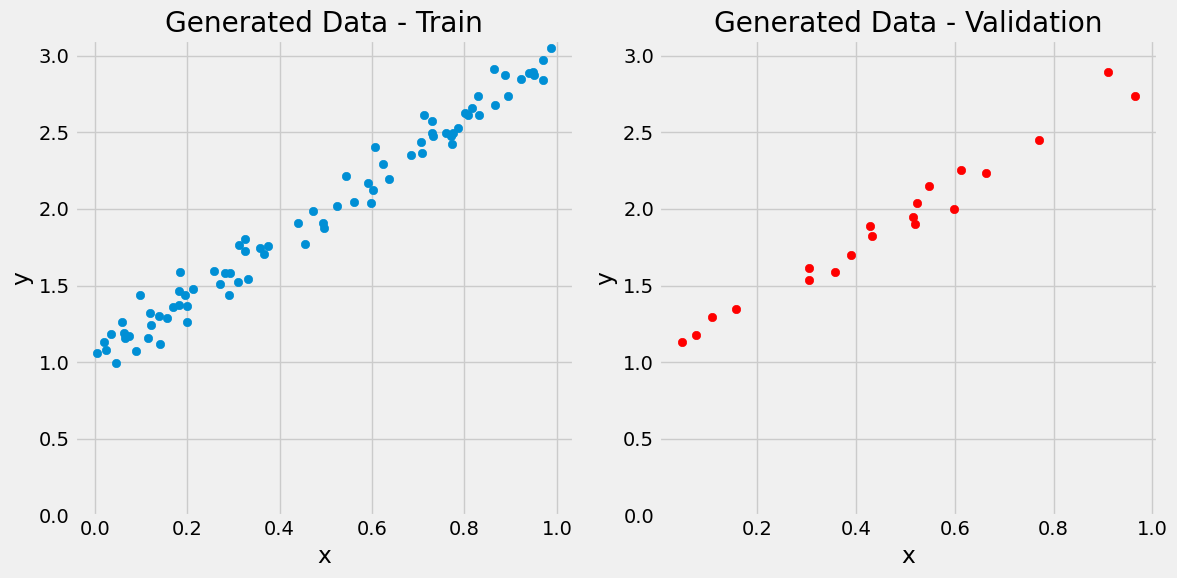

In [5]:
plot_train_test(X_train, y_train, X_val, y_val)

### 2. Random intialization and initial fit

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [7]:
yhat = b + w * X_train

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

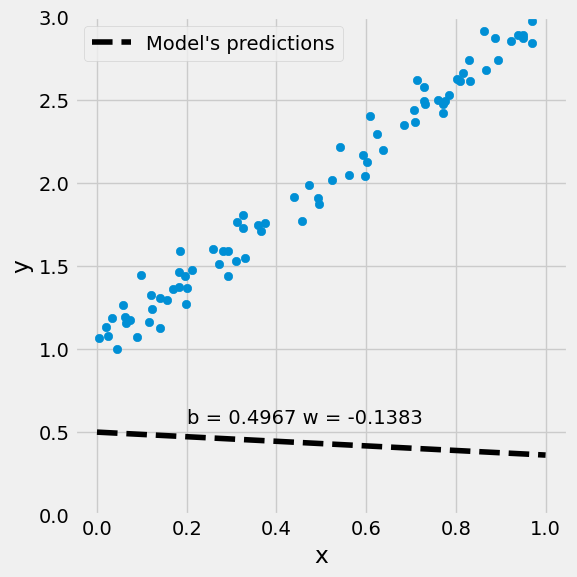

In [8]:
display_fit(X_train, y_train, b, w)

$$
\Large \text{error}^{(i)} = \hat{y}^{(i)} - y^{(i)}
$$

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

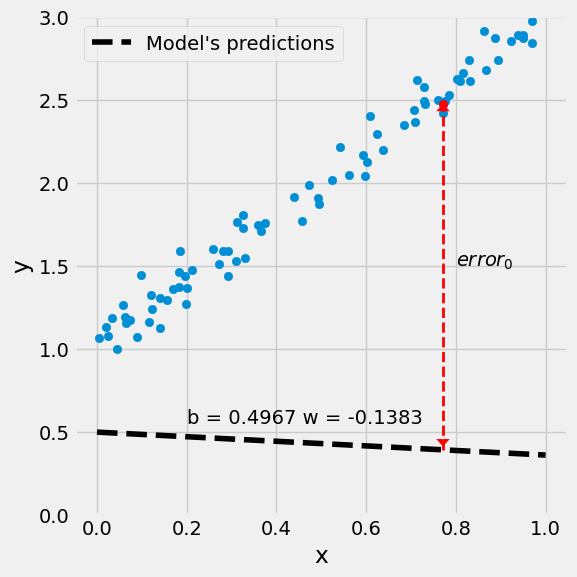

In [9]:
display_fit_error(X_train, y_train, b, w)

### 3. Objective/Lost/Cost Function

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}^{(i)}}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y}^{(i)} - y^{(i)})}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x^{(i)} - y^{(i)})}^2
\end{aligned}
$$

In [10]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


##### 3.1 Plotting the loss surface

In [11]:
# Reminder:
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each
# b from -2 to 4, w from -1 to 5
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)

# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [12]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [13]:
sample_x = X_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [14]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=X_train
)
all_predictions.shape

(80, 101, 101)

In [15]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [16]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [17]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

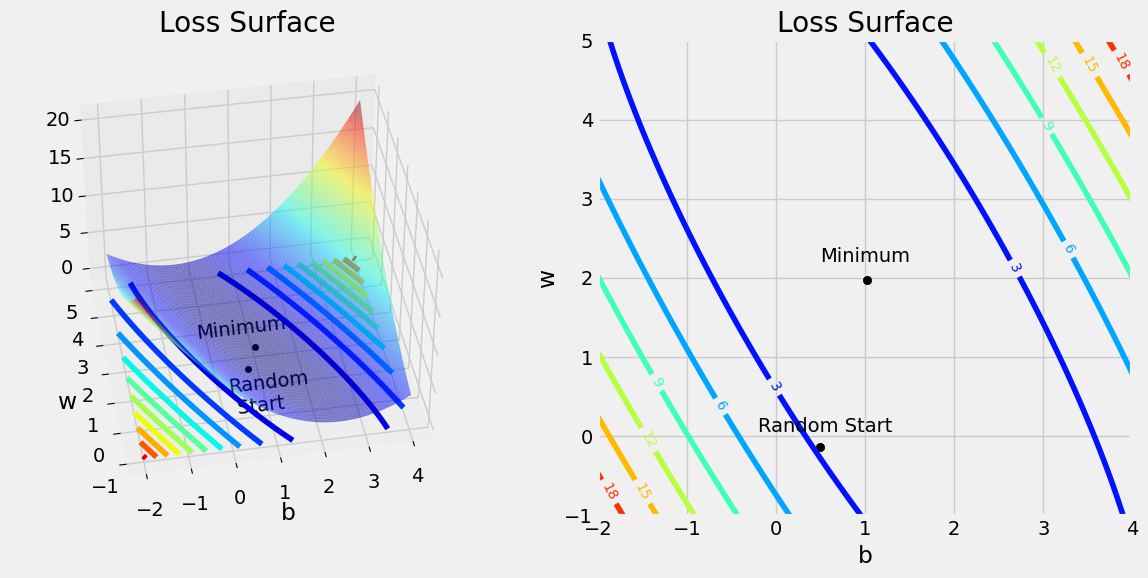

In [18]:
range_plot(X_train, y_train, b, w, bs, ws, all_losses)

##### 3.2 Cross section analysis

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

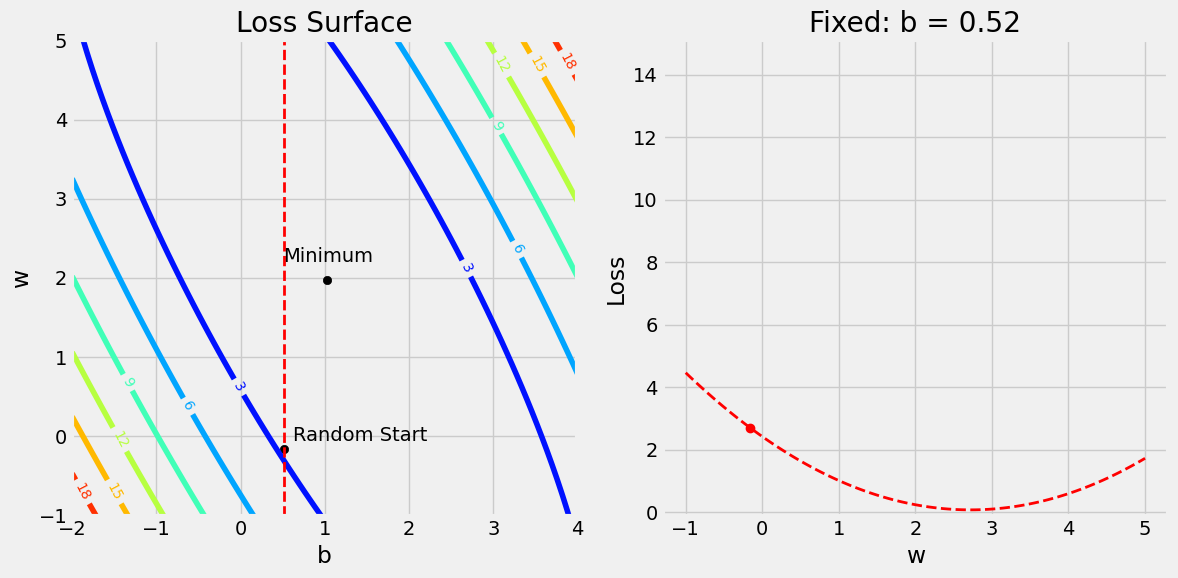

In [19]:
cross_section_fixed_b(X_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

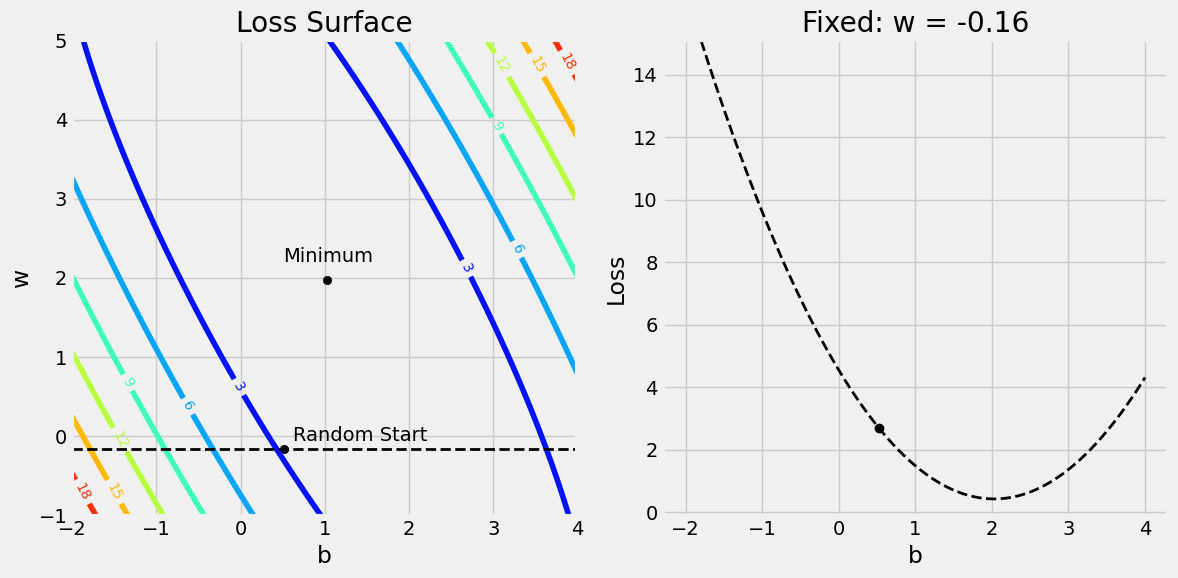

In [20]:
cross_section_fixed_w(X_train, y_train, b, w, bs, ws, all_losses)

### 4. Gradient Descent Intuition

$$
\Large
\mathcal{J}(w, b) = MSE = \frac{1}{n} \sum_{i=1}^n{(b + w x^{(i)} - y^{(i)})}^2 \\
\hspace{4 mm} \\
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y}^{(i)}}} \frac{\partial{\hat{y}^{(i)}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x^{(i)} - y^{(i)})} 
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y}^{(i)} - y^{(i)})}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y}^{(i)}}} \frac{\partial{\hat{y}^{(i)}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x^{(i)} - y^{(i)}) x^{(i)}} 
&= 2 \frac{1}{n} \sum_{i=1}^n{x^{(i)} (\hat{y}^{(i)} - y^{(i)})}
\end{aligned}
$$

In [21]:
# Compute gradients for both "b" and "w"
b_grad = 2 * error.mean()
w_grad = 2 * (X_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


##### 4.1 Visualize Gradients

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

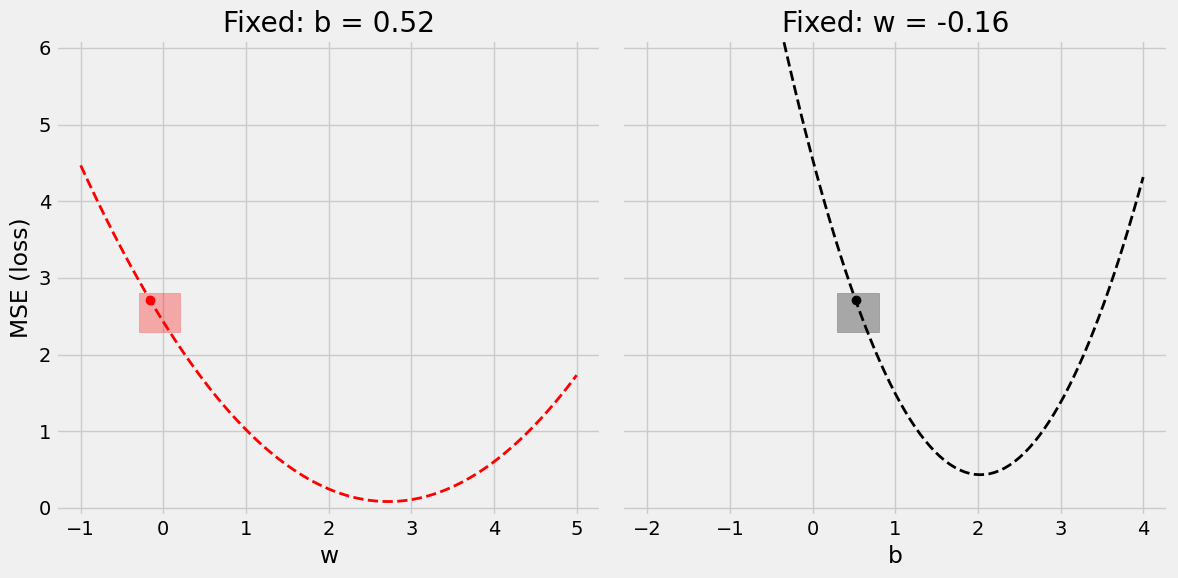

In [22]:
visualize_gradient(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

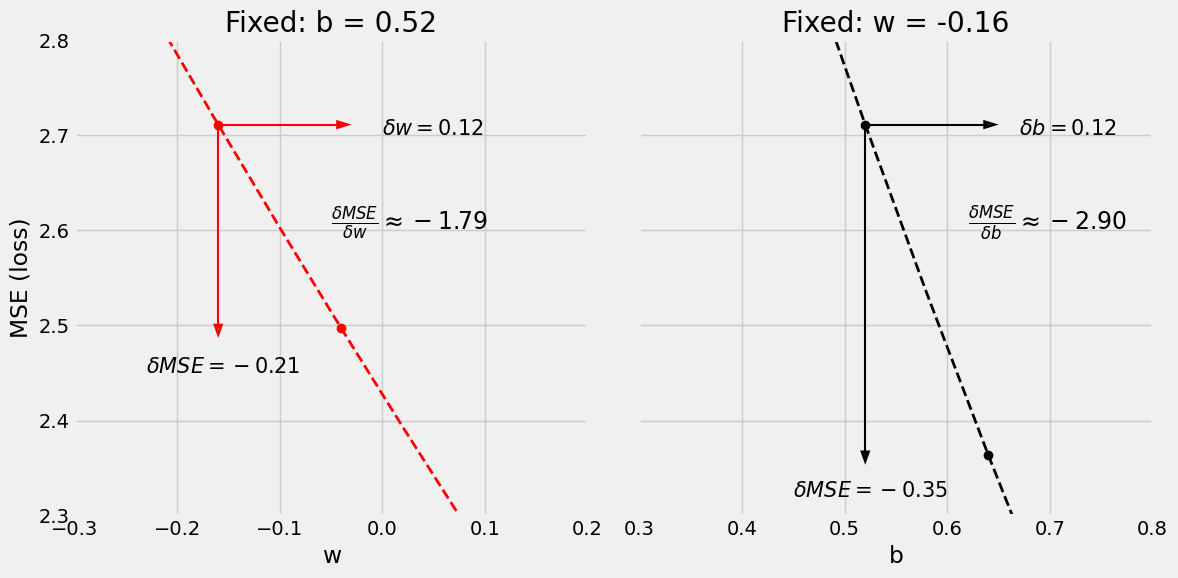

In [23]:
annotated_delta_sensitivity(b, w, bs, ws, all_losses)

### 5. Gradient Descent (aka Backpropagation)

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [24]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# error = wx + b - yi
b_grad = 2 * error.mean() 
w_grad = 2 * (X_train * error).mean()
print(b_grad, w_grad)

# Update parameters using gradients and learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
-3.044811379650508 -1.8337537171510832
[0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

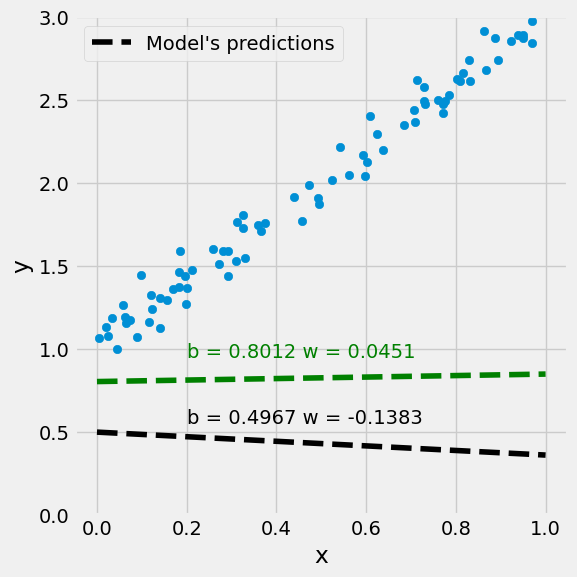

In [25]:
regression_line_after_single_descent(X_train, y_train, b, w)

##### 5.1 Learning rate related issues

In [26]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

**Low Learning_rate**

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

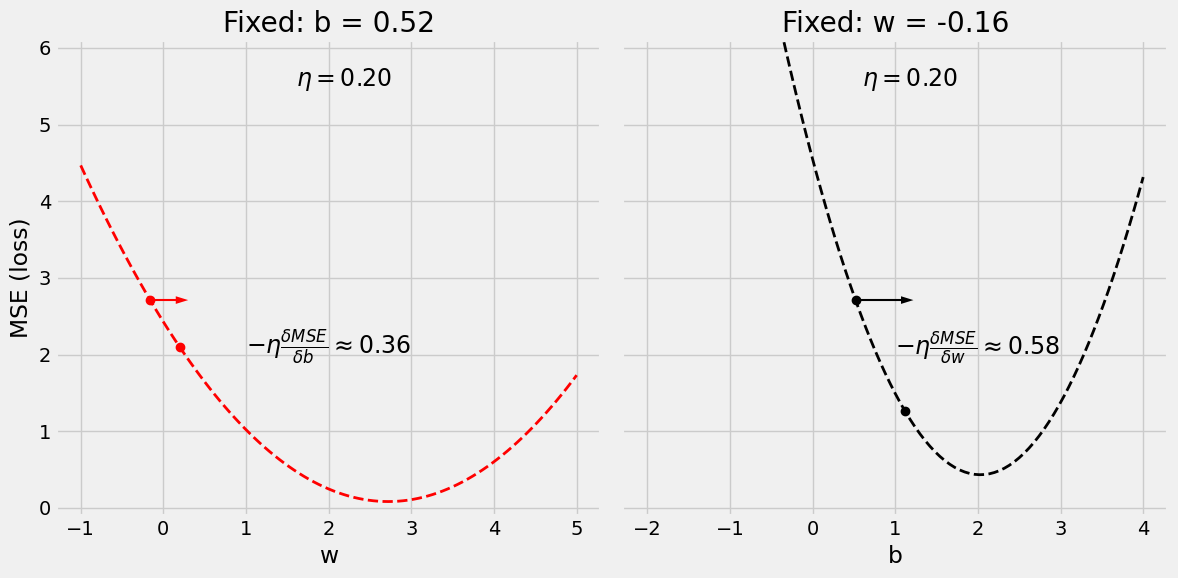

In [27]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

learning_rate_plot(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

**High learning rate**

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

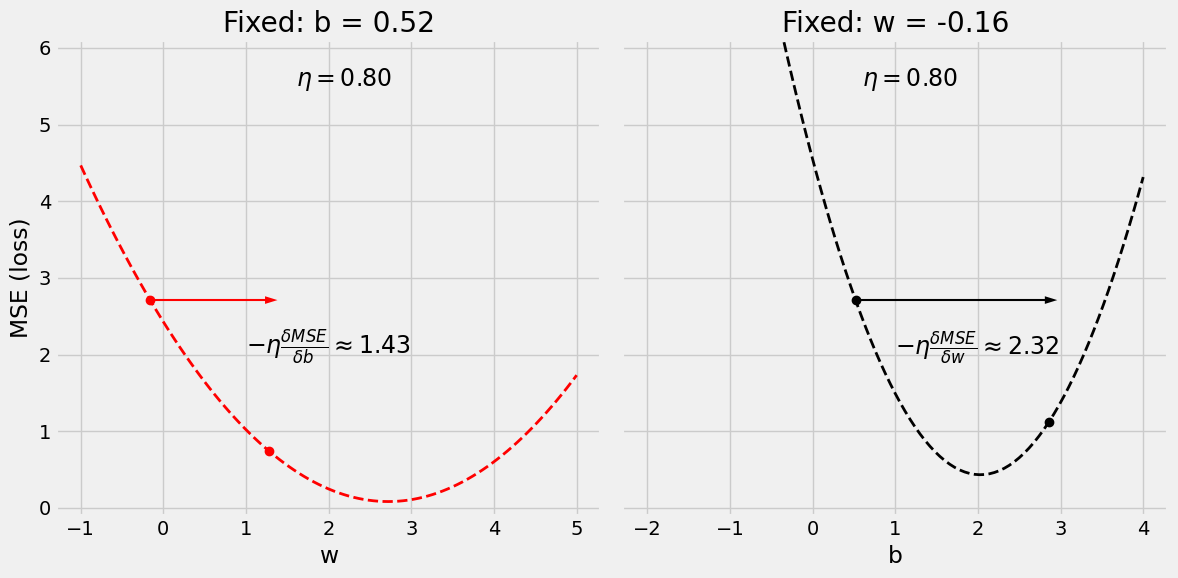

In [28]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

learning_rate_plot(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

**Very high learning rate**

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

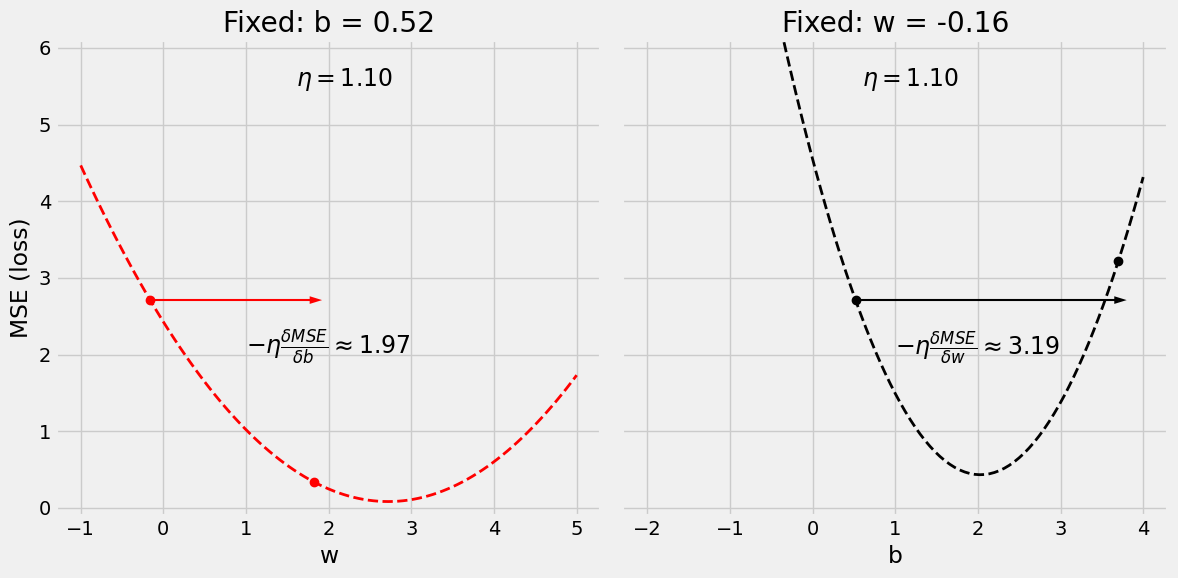

In [29]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

learning_rate_plot(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

### 6. Putting it all together

##### A. Actual analytical function on the population
$$
\Large
y^{(i)} = f(x^{(i)})
$$

##### B. On a sample, in reality
$$
\Large
y^{(i)} = f(x^{(i)}) + \epsilon
$$

where $ \epsilon $ is noise.


##### C. Hypothesis function
$$
\Large
\hat{y}^{(i)} = \mathcal{h}(x^{(i)}; w, b) = wx^{(i)} + b
$$

##### D. Cost function
$$
\Large
\begin{aligned}
\mathcal{J}(w, b) = MSE & = \frac{1}{2n} \sum_{i=1}^n{(b + w x^{(i)} - y^{(i)})}^2 \\
\end{aligned}
$$

| What | Details | 
| --- | --- |
| Parameters | w, b | 
| Objective | $ \arg \min_{w,b} \mathcal{J}(w, b) $ |


##### E. Analytical gradient
$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} & = \frac{1}{n} \sum_{i=1}^n{(\hat{y}^{(i)} - y^{(i)})} \\
\frac{\partial{\text{MSE}}}{\partial{w}} & = \frac{1}{n} \sum_{i=1}^n{x^{(i)} (\hat{y}^{(i)} - y^{(i)})}
\end{aligned}
$$


##### F. Iterative numerical gradient descent

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [30]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [31]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [32]:
import math, copy
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            # print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
            #       f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
            #       f"w: {w: 0.3e}, b:{b: 0.5e}")
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b:{b}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

|Iteration |  w    | b     |  Cost |  dJ/dw   |   dJ/db  |
|---|---|---|---|---|---|
|         0| 0.0110| 0.0195| 2.0443|   -1.1077|   -1.9538|
|      1000| 1.4309| 1.2985| 0.0178|   -0.0407|   0.02078|
|      2000| 1.7162| 1.1527| 0.0071|   -0.0191|   0.00976|
|      3000| 1.8502| 1.0842| 0.0047|   -0.0090|   0.00459|
|      4000| 1.9132| 1.0520| 0.0042|   -0.0042|   0.00215|
|      5000| 1.9430| 1.0369| 0.0041|   -0.0020|   0.00101|
|      6000| 1.9567| 1.0298| 0.0040|   -0.0009|   0.00047|
|      7000| 1.9632| 1.0265| 0.0040|   -0.0004|   0.00022|
|      8000| 1.9663| 1.0249| 0.0040|   -0.0002|   0.00010|
|      9000| 1.9677| 1.0242| 0.0040|-9.637e-05| 4.925e-05|

In [33]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost [2.04432182]  dj_dw: [-1.10772534], dj_db: [-1.95379564]   w: [0.01107725], b:[0.01953796]
Iteration 1000: Cost [0.01781363]  dj_dw: [-0.04067919], dj_db: [0.02078013]   w: [1.43087331], b:[1.29853126]
Iteration 2000: Cost [0.00706508]  dj_dw: [-0.01910565], dj_db: [0.00976418]   w: [1.7162187], b:[1.15270956]
Iteration 3000: Cost [0.00469365]  dj_dw: [-0.00897413], dj_db: [0.00458634]   w: [1.85024706], b:[1.08421273]
Iteration 4000: Cost [0.00417044]  dj_dw: [-0.00421525], dj_db: [0.00215425]   w: [1.91320163], b:[1.05203903]
Iteration 5000: Cost [0.00405501]  dj_dw: [-0.00197995], dj_db: [0.00101188]   w: [1.94277206], b:[1.0369267]
Iteration 6000: Cost [0.00402954]  dj_dw: [-0.00093], dj_db: [0.00047529]   w: [1.95666161], b:[1.02982828]
Iteration 7000: Cost [0.00402392]  dj_dw: [-0.00043683], dj_db: [0.00022325]   w: [1.96318569], b:[1.02649407]
Iteration 8000: Cost [0.00402268]  dj_dw: [-0.00020518], dj_db: [0.00010486]   w: [1.96625011], b:[1.02492796]
Itera

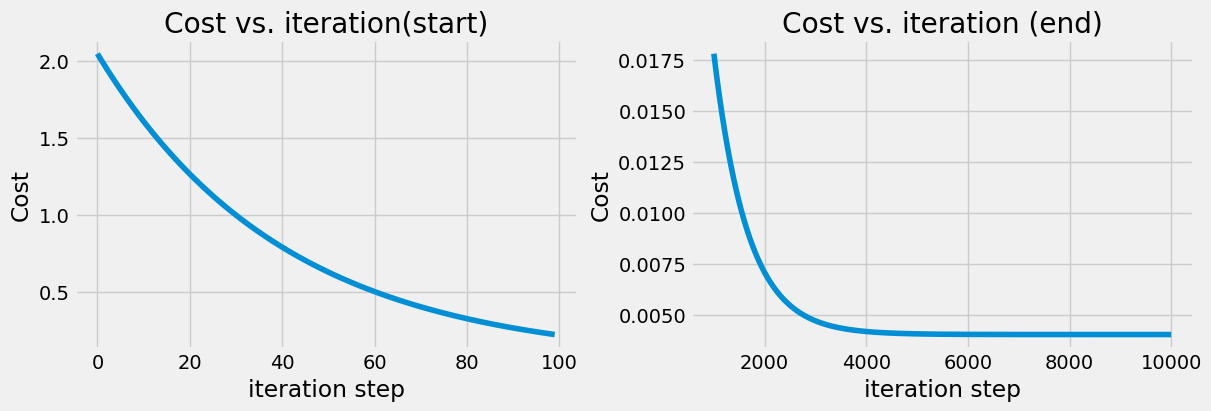

In [34]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [35]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * X_train[i] + b_final

C:\Users\srikanth\AppData\Local\Temp\ipykernel_10364\1719647994.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w_final * X_train[i] + b_final


##### 6.1 Inference with Linear Regression

Text(0.5, 0, 'x')

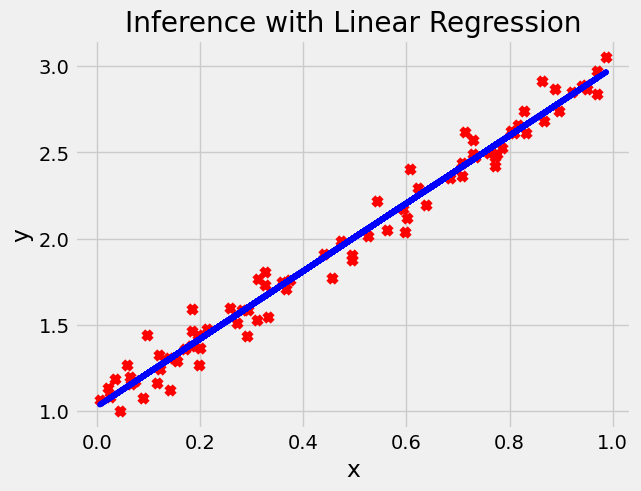

In [36]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

### 7. Impact of StandardScaler on Gradient Descent 

In [37]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 100
bad_w = true_w / 100
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 100

# So, the net effect on y is zero - it is still
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [38]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

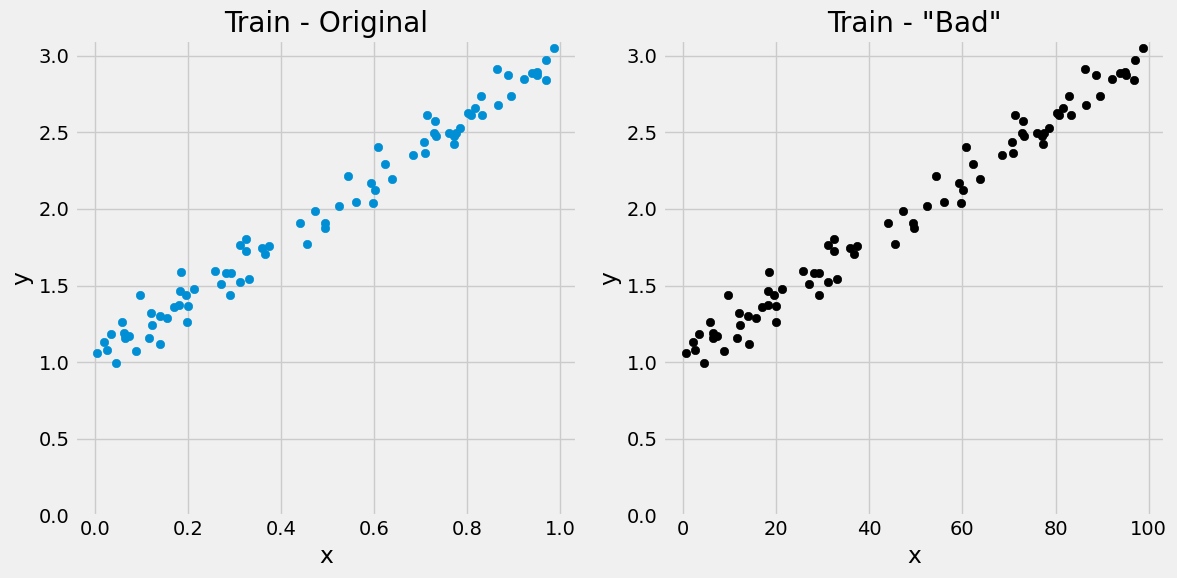

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [40]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Before'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - After'}, xlabel='b', ylabel='w'>],
       dtype=object))

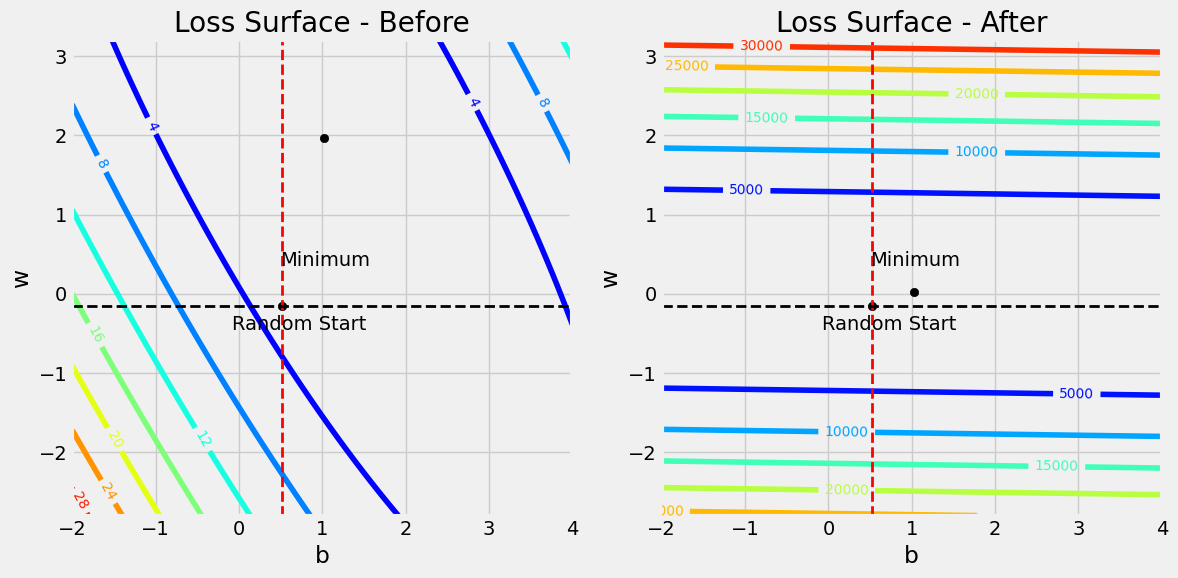

In [41]:
loss_surface_good_bad(X_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

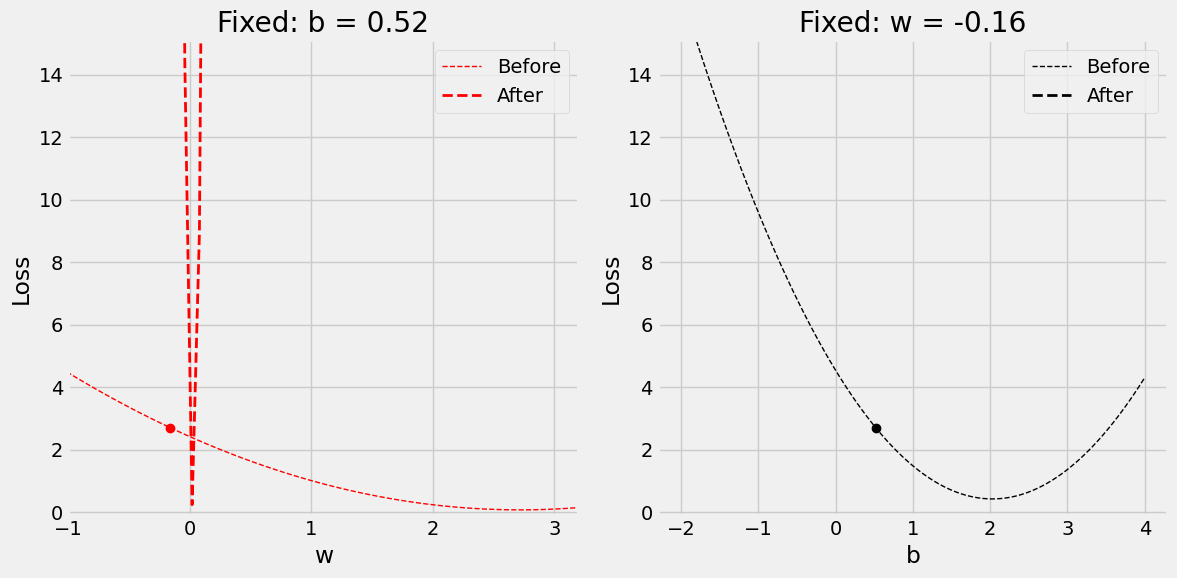

In [44]:
cost_function_good_bad(X_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(X_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(X_train)
scaled_x_val = scaler.transform(X_val)

In [46]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1500x600 with 3 Axes>,
 array([<Axes: title={'center': 'Loss Surface - Original'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - "Bad"'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Loss Surface - Scaled'}, xlabel='b', ylabel='w'>],
       dtype=object))

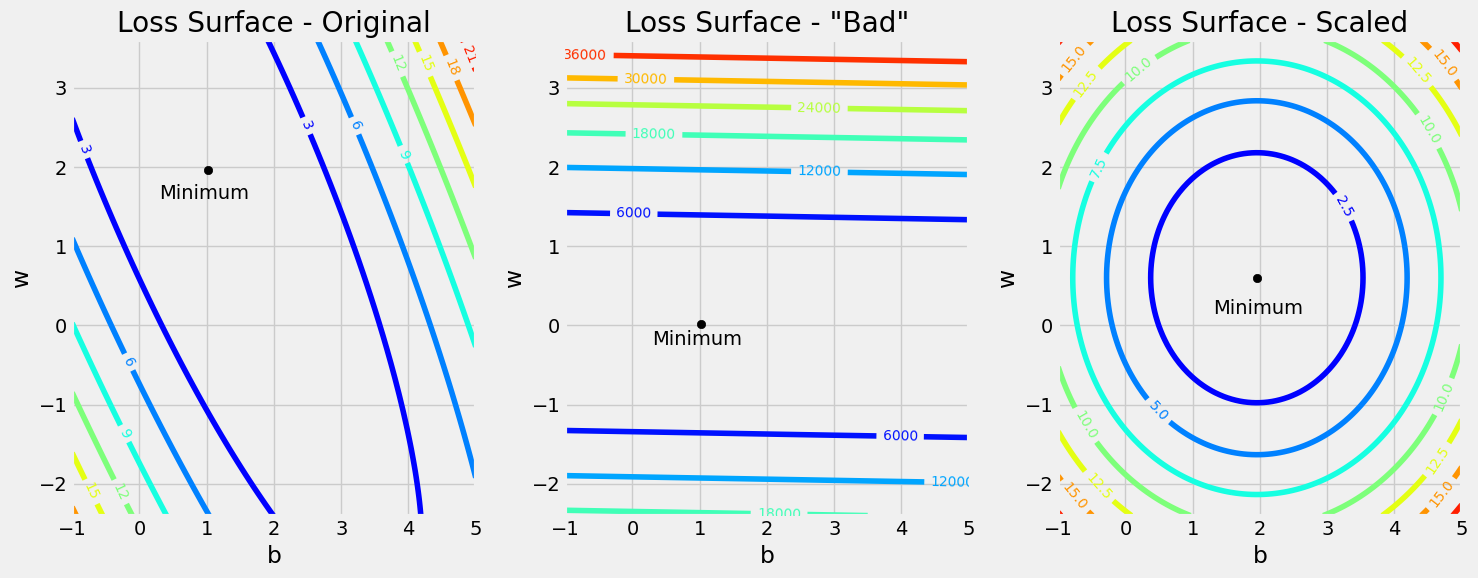

In [47]:
loss_surface_good_bad_scaled(X_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)